In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint
from scipy.stats import kurtosis, skew


sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('../data/kindey stone urine analysis.csv')

In [3]:
X = df.ph
Y = df.urea
B = 200 #number of bootstrap samples

In [4]:
discrete_uniform = randint(low = 0, high=79) #distribution

In [5]:
def bootstrap_statistic(sampling_distribution, statistic, X, B):
    T_star = np.empty(shape=(B))
    X_star = np.empty(shape=(B,len(X)))
    for i in range(B):
        X_star_i = X[sampling_distribution.rvs(size=len(X))]
        X_star[i] = X_star_i
        T_star_i = statistic(X_star_i)
        T_star[i] = T_star_i
    return X_star, T_star, statistic(T_star)

In [6]:
def bootstrap_samples(X,B,sampling_distribution):
    X_star = np.empty(shape=(B,len(X)))
    for i in range(B):
        X_star[i] = X[sampling_distribution.rvs(size=len(X))]
    return X_star

In [7]:
def sample_standard_error(X:np.ndarray) -> float:
    X_centered_squared = (X-X.mean())**2
    return np.sqrt(np.sum(X_centered_squared)/(len(X)-1))

In [8]:
def variance(X:np.ndarray) -> float:
    X_centered_squared = (X-X.mean())**2
    return np.sum(X_centered_squared)/len(X)

In [9]:
X_star = bootstrap_samples(X,B,discrete_uniform)

In [10]:
###Compute the sample mean
T_means = np.empty(B)
for i, x in enumerate(X_star):
    T_means[i] = x.mean()
print(f"Bootstrap mean: {T_means.mean()}, Data mean {X.mean()}")

Bootstrap mean: 6.030870253164558, Data mean 6.028481012658226


In [11]:
print(f"Standard error of the mean: {sample_standard_error(T_means)}, std dev of X: {sample_standard_error(X)}")

Standard error of the mean: 0.08708108413166259, std dev of X: 0.724307075776203


c:\Users\Darius\miniconda3\envs\general_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


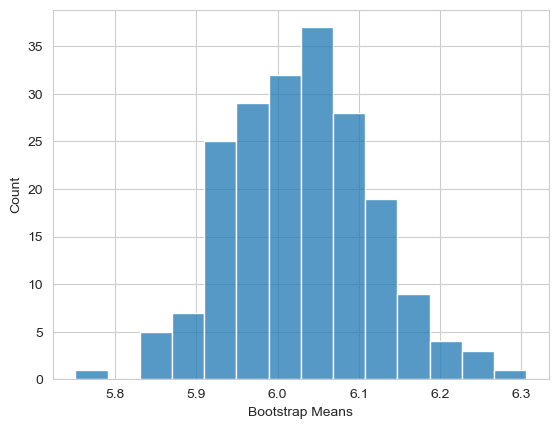

In [12]:
ax = sns.histplot(T_means)
ax.set_xlabel("Bootstrap Means")
plt.show()

In [19]:
def bootstrap_bivariate_samples(X,Y,B,sampling_distribution):
    X_star = np.empty(shape=(B,len(X)))
    Y_star = np.empty(shape=(B,len(X)))
    for i in range(B):
        idx = sampling_distribution.rvs(size=len(X))
        X_star[i] = X[idx]
        Y_star[i] = Y[idx]
    return X_star, Y_star

In [20]:
X_star, Y_star = bootstrap_bivariate_samples(X,Y,B,discrete_uniform)

In [21]:
T_boot_corr = np.empty(B)
for i in range(len(X_star)):
    T_boot_corr[i] = np.corrcoef(X_star[i],Y_star[i])[0][1]

In [22]:
T_boot_corr= np.load('T_boot_corr.npy')

c:\Users\Darius\miniconda3\envs\general_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


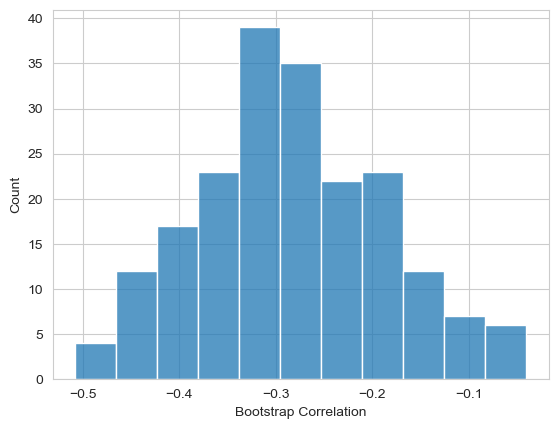

In [23]:
ax = sns.histplot(T_boot_corr)
ax.set_xlabel('Bootstrap Correlation')
plt.show()

In [24]:
print(f"Kurtosis = {kurtosis(T_boot_corr)} | Skew = {skew(T_boot_corr)}")

Kurtosis = -0.3597486556625231 | Skew = 0.17216587994348576


In [27]:
T_boot_corr.mean()

-0.28210017901180334

In [28]:
aux = bootstrap_samples(T_boot_corr,B,randint(low = 0, high=len(T_boot_corr)))

In [28]:
np.corrcoef(X,Y)

array([[ 1.        , -0.27555694],
       [-0.27555694,  1.        ]])

In [31]:
X_star, T_star,  sample_var_boot = bootstrap_statistic(discrete_uniform, sample_standard_error, X, B)

In [34]:
T_star.mean()

0.7185983453090883

In [35]:
sample_standard_error(X)

0.724307075776203

In [36]:
sample_var_boot

0.06070349192428867

c:\Users\Darius\miniconda3\envs\general_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='T*', ylabel='Count'>

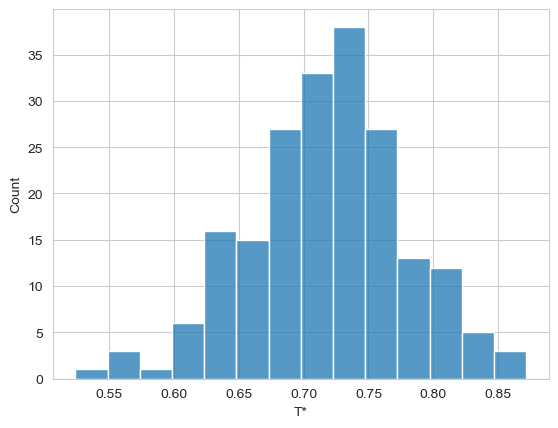

In [37]:
fig, axes = plt.subplots()
axes.set_xlabel('T*')
sns.histplot(data=T_star, ax=axes)

In [38]:
def sample_mean(X:np.ndarray) -> float:
    return X.mean()

In [42]:
kurt = kurtosis(T_star)
skewness = skew(T_star)

In [43]:
kurt

0.19986740923648139

In [44]:
skewness

-0.17884314529246897

In [45]:
kurt_x = kurtosis(X)
skew_x = skew(X)

In [46]:
kurt_x

0.22605058388210253

In [47]:
skew_x

0.7246834148840973

### Correlation Coefficient

In [48]:
Y = df.urea

In [49]:
np.corrcoef(X,Y)[0][1]

-0.2755569443216652

In [50]:
def bootstrap_corrcoef(sampling_distribution,X,Y,B):
    T_star = np.empty(shape=(B))
    X_star = np.empty(shape=(B,len(X)))
    Y_star = np.empty(shape=(B,len(Y)))
    for i in range(B):
        idx = sampling_distribution.rvs(size=len(X))
        X_star_i = X[idx]
        Y_star_i = Y[idx]
        X_star[i] = X_star_i
        Y_star[i] = Y_star_i
        T_star_i = np.corrcoef(X_star_i, Y_star_i)[0][1]
        T_star[i] = T_star_i
    return X_star, Y_star, T_star

In [51]:
x,y,t = bootstrap_corrcoef(discrete_uniform,X,Y,B)

c:\Users\Darius\miniconda3\envs\general_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

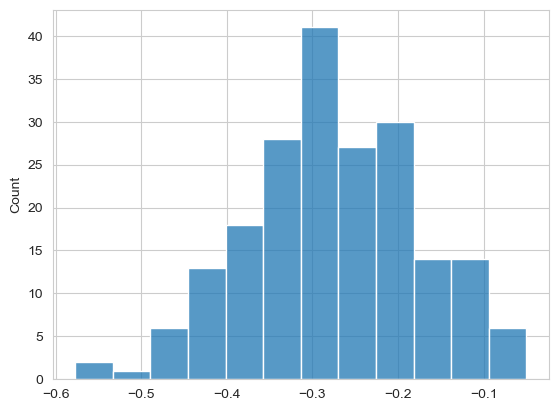

In [52]:
sns.histplot(t)

#### Different values for B

In [53]:
B_values = np.arange(25, 5000, 50, dtype=int)

In [54]:
def standard_error(X:np.ndarray) -> float:
    X_centered_squared = (X-X.mean())**2
    return np.sqrt(np.sum(X_centered_squared)/(len(X)-1))

In [55]:
def bootstrap_statistic_std(sampling_distribution, statistic, X, B):
    T_star = np.empty(shape=(B))
    for i in range(B):
        X_star_i = X[sampling_distribution.rvs(size=len(X))]
        T_star[i] = statistic(X_star_i)
    return standard_error(T_star)

In [57]:
estimates = np.empty(len(B_values))
for i, B in enumerate(B_values):
    estimates[i] = bootstrap_statistic_std(discrete_uniform, np.median, X, B)

In [ ]:
B_table = pd.DataFrame(data=estimates, index=B_values, columns=['Bootstrapped Std. Error of the Median'])

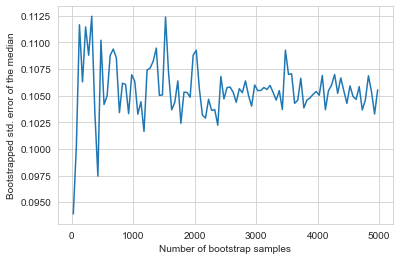

In [ ]:
B_table.plot(legend=False, xlabel='Number of bootstrap samples', ylabel='Bootstrapped std. error of the median')
plt.show()

In [ ]:
B_table.transpose()

,25,75,125,175,225,275,325,375,425,475,...,4525,4575,4625,4675,4725,4775,4825,4875,4925,4975
Bootstrapped Std. Error of the Median,0.093897,0.100244,0.111638,0.106284,0.111441,0.108782,0.112439,0.103501,0.097444,0.110187,...,0.105908,0.104917,0.10464,0.10584,0.103647,0.104588,0.106852,0.105346,0.103272,0.105534


In [ ]:
print(f"min = {B_table['Bootstrap Estimate'].min()}  max={B_table['Bootstrap Estimate'].max()}")

min = 0.09389710680668853  max=0.11243875192509448
